<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Used versions**
- python 3.6
- tensorflow 1.14
- keras 2.0
- gensim 3.8.0

### **Libraries**

In [ ]:
from sklearn.datasets import load_files
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from  sklearn.metrics  import accuracy_score
from sklearn import metrics
import numpy as np
import re
from collections import Counter
import scipy.sparse as sp
from numpy.linalg import norm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

### **Load data**

In [ ]:
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target



# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [ ]:
print("x : {}".format(x_train[0]))
print("y : {}".format(y_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.
y : 1


### **[Question 1] BoW scratch mounting**

Create a program that requires the following 3-sentence BoW without using scikit-learn. 

Calculate with 1-gram and 2-gram.

In [ ]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]
  
# 1-grim
vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df1 = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())

# 2-grim
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df2 = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())

print("1-gram")
display(df1)
print("2-grim")
display(df2)

1-gram


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


2-grim


,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


### **[Question 2] TF-IDF Calculation**

Vectorize the IMDB Movie Review dataset with TF-IDF. Use NLTK stop words and set the maximum vocabulary size to about 5000. Pre-processing such as text cleaning and stemming is not required in this issue.

In [ ]:
# Stop words
stop_words = nltk.download('stopwords')
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


#### **CountVectorizer**

In [ ]:
vectorizer = CountVectorizer(stop_words=stop_words, max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train)).toarray()
bow_test = (vectorizer.fit_transform(x_test)).toarray()
#print(bow_train)
df_train = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
df_test = pd.DataFrame(bow_test, columns=vectorizer.get_feature_names())
display(df_train.head(20))
display(df_test.head(20))
print("df train shape: {}".format(df_train.shape))
print("df test shape: {}".format(df_test.shape))

,00,000,10,100,11,12,13,13th,14,15,...,york,young,younger,youth,zellweger,zero,zoey,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,00,000,10,100,11,12,13,13th,14,15,...,york,young,younger,youth,zellweger,zero,zoey,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


df train shape: (25000, 5000)
df test shape: (25000, 5000)


####**TF-IDF Vectorizer**

In [ ]:
vectorizer = TfidfVectorizer(norm='l2',max_features = 5000,stop_words=stop_words)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)
#print("Feature names: {}".format(vectorizer.get_feature_names()))
print("train shape: {}".format(X_train.shape))
print("tets shape: {}".format(X_test.shape))
print(X_train)

train shape: (25000, 5000)
tets shape: (25000, 5000)
  (0, 2158)	0.16743479423204646
  (0, 4444)	0.10041129167597976
  (0, 2156)	0.1279936881849026
  (0, 1769)	0.15681106322388316
  (0, 3884)	0.05436294092381458
  (0, 2609)	0.13078643200728501
  (0, 267)	0.08381220735492088
  (0, 201)	0.08282260831175318
  (0, 1670)	0.16768439105128702
  (0, 4045)	0.1495900878396859
  (0, 1920)	0.08322948062718752
  (0, 1734)	0.0809511532827876
  (0, 1459)	0.17300582102971174
  (0, 475)	0.13734353234274008
  (0, 111)	0.14007222716965326
  (0, 2932)	0.1671726902261627
  (0, 1606)	0.1649274006108069
  (0, 4443)	0.2625874845921025
  (0, 3436)	0.1465074496779634
  (0, 3635)	0.14016268714570973
  (0, 114)	0.07492419060647448
  (0, 1737)	0.14034457344060158
  (0, 4515)	0.052427901534780254
  (0, 2907)	0.0905258969962952
  (0, 1933)	0.09528142995538946
  :	:
  (24999, 3233)	0.03561752132456323
  (24999, 902)	0.1001893037306074
  (24999, 2053)	0.06323310163928071
  (24999, 1739)	0.08018138417806203
  (24999, 2

### **[Question 3] Learning with TF-IDF**

Use the vector obtained in question 2 to train and estimate the IMDB movie review dataset. Use any model that can perform binary classification.

We don't want high accuracy here, but try varying the maximum vocabulary count, stop words, and n-gram to verify the impact

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear', random_state=0, verbose=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=True)

In [ ]:
predicted = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test,predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print("Recall:",metrics.recall_score(y_test, predicted))

Accuracy: 0.8752
Precision: 0.8768884603021536
Recall: 0.87296


### **[Question 4] TF-IDF scratch mounting**

Create a program that requires TF-IDF with the following 3 sentences without using scikit-learn. Create two types:

standard expressions and expressions used by scikit-learn. Normalization is not required.

In [ ]:
class TFIDF(object):

    def __init__(self, corpus):        
        self.corpus = corpus      

    def __normalize_corpus(self, d):
        stop_words = nltk.corpus.stopwords.words('english')
        d = re.sub(r'[^a-zA-Z0-9\s]', '', d, re.I|re.A)
        d = d.lower().strip()
        tks = nltk.word_tokenize(d)
        f_tks = [t for t in tks if t not in stop_words]
        return ' '.join(f_tks)

    def preprocessing_text(self):
        n_c = np.vectorize(self.__normalize_corpus)
        self.norm_corpus = n_c(self.corpus)

    def tf(self):
        words_array = [doc.split() for doc in self.norm_corpus]
        words = list(set([word for words in words_array for word in words]))
        features_dict = {w:0 for w in words}
        tf = []
        for doc in self.norm_corpus:
            bowf_doc = Counter(doc.split())
            all_f = Counter(features_dict)
            bowf_doc.update(all_f)
            tf.append(bowf_doc)
        return pd.DataFrame(tf)

    def df(self, tf):
        features_names = list(tf.columns)
        df = np.diff(sp.csc_matrix(tf, copy=True).indptr)
        df = 1 + df
        return df
        
    def idf(self, df):
        N = 1 + len(self.norm_corpus)
        idf = (1.0 + np.log(float(N) / df)) 
        idf_d = sp.spdiags(idf, diags= 0, m=len(df), n= len(df)).todense()      
        return idf, idf_d

    def tfidf(self, tf, idf):        
        tf = np.array(tf, dtype='float64')
        tfidf = tf * idf
        norms = norm(tfidf , axis=1)
        return (tfidf / norms[:,None])

In [ ]:
#nltk.download('punkt')
mini_dataset2 = \
    ["This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"]
    
    
tfidf_scratch = TFIDF(mini_dataset2)
tfidf_scratch.preprocessing_text()

tf = tfidf_scratch.tf()
print("TF:\n",tf)

df = tfidf_scratch.df(tf)
print("df\n",df)

idf, idf_2 = tfidf_scratch.idf(df)
print("IDF:\n",idf)

tfidf = tfidf_scratch.tfidf(tf,idf)
print("TF-IDF: \n",tfidf)

df = pd.DataFrame(np.round(tfidf,2),columns = list(tf.columns))
display(df)

TF:
    movie  soooo  funny  ever  never  best
0      1      1      1     0      0     0
1      1      0      0     0      1     0
2      2      0      0     1      0     1
df
 [4 2 2 2 2 2]
IDF:
 [1.         1.69314718 1.69314718 1.69314718 1.69314718 1.69314718]
TF-IDF: 
 [[0.38537163 0.65249088 0.65249088 0.         0.         0.        ]
 [0.50854232 0.         0.         0.         0.861037   0.        ]
 [0.64105545 0.         0.         0.54270061 0.         0.54270061]]


,movie,soooo,funny,ever,never,best
0,0.39,0.65,0.65,0.00,0.00,0.00
1,0.51,0.00,0.00,0.00,0.86,0.00
2,0.64,0.00,0.00,0.54,0.00,0.54


### **【Problem 5】Corpus pretreatment**

Preprocessing for the corpus should include removing special characters (such as !), URLs, and lowercase uppercase letters. Also, divide the words (tokens) in a list.

In [ ]:
vectorizer = CountVectorizer(stop_words=stop_words, max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train)).toarray()
sentences = vectorizer.get_feature_names()
print(sentences)

['00', '000', '10', '100', '11', '12', '13', '13th', '14', '15', '16', '17', '18', '1930', '1930s', '1933', '1940', '1950', '1950s', '1960', '1960s', '1968', '1970', '1970s', '1971', '1972', '1973', '1980', '1980s', '1983', '1984', '1987', '1990', '1993', '1995', '1996', '1997', '1999', '1st', '20', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '20th', '24', '25', '2nd', '30', '3000', '30s', '35', '3d', '3rd', '40', '45', '50', '50s', '60', '60s', '70', '70s', '80', '80s', '90', '90s', '99', 'abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activities', 'actor', 'act

###**[Question 6] Learning Word2Vec**

In [ ]:
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習

print("Vocabulary list : {}".format(model.wv.vocab.keys()))

for vocab in model.wv.vocab.keys():
  print("{} vector of : \n{}".format(vocab, model.wv[vocab]))

Vocabulary list : dict_keys(['0', '1', '2', '3', 't', 'h', '4', '5', '6', '7', '8', '9', 's', 'n', 'd', 'r', 'a', 'b', 'o', 'e', 'c', 'i', 'l', 'y', 'm', 'u', 'v', 'p', 'g', 'q', 'f', 'w', 'k', 'x', 'z', 'é', 'j'])
0 vector of : 
[ 1.4892437 -2.3756356 -0.41592    4.192767   4.006834  -0.7210079
 -6.7097197  0.2602391 -3.0719326 -3.211419 ]
1 vector of : 
[ 2.7571092 -0.7499641 -5.8894567 -5.488125  -0.9837294  4.1298957
 -3.3106344  6.199447  -9.050334  -5.586955 ]
2 vector of : 
[-7.039181   1.7065445 -1.0836129  3.4045162  2.4735358 -2.729365
 -3.486529  -1.2012658 -0.6689399 -2.0845795]
3 vector of : 
[-2.21273     1.6522807  -1.6324676   0.36154422  0.6909144  -0.6382267
 -2.4045863  -2.3092983   3.3108394  -2.8024132 ]
t vector of : 
[ 0.2467693   1.4569268   0.8068853  -1.3129661  -0.71575886 -0.11877001
  0.82781845  0.5915503   1.1666849   1.3531394 ]
h vector of : 
[-0.38185772 -0.954626    0.2651847   1.164865    0.2768444  -0.2837369
  0.2696238   1.0170159  -1.5930295   1.

###**[Question 7] (Advanced Task) Visualization of vectors**

#### **Word distance**

In [ ]:
model.wv.most_similar(positive="a", topn=3)

[('o', 0.9096972346305847), ('7', 0.7908162474632263), ('i', 0.76949542760849)]

### **visualization**

c:\Users\Oggy\anaconda3\envs\OggyEnv\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


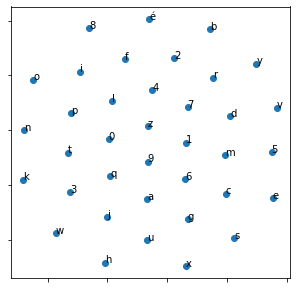

In [ ]:
vocabs = model.wv.vocab.keys()

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()